<a href="https://colab.research.google.com/github/Sananda-Dutta/CODSOFT/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Accuracy: 82.68%

=== Feature Importance ===
      Feature  Importance
7       Title    0.282423
1         Sex    0.279737
3        Fare    0.124313
0      Pclass    0.116520
5  FamilySize    0.082774
2         Age    0.081779
4    Embarked    0.021598
6     IsAlone    0.010856


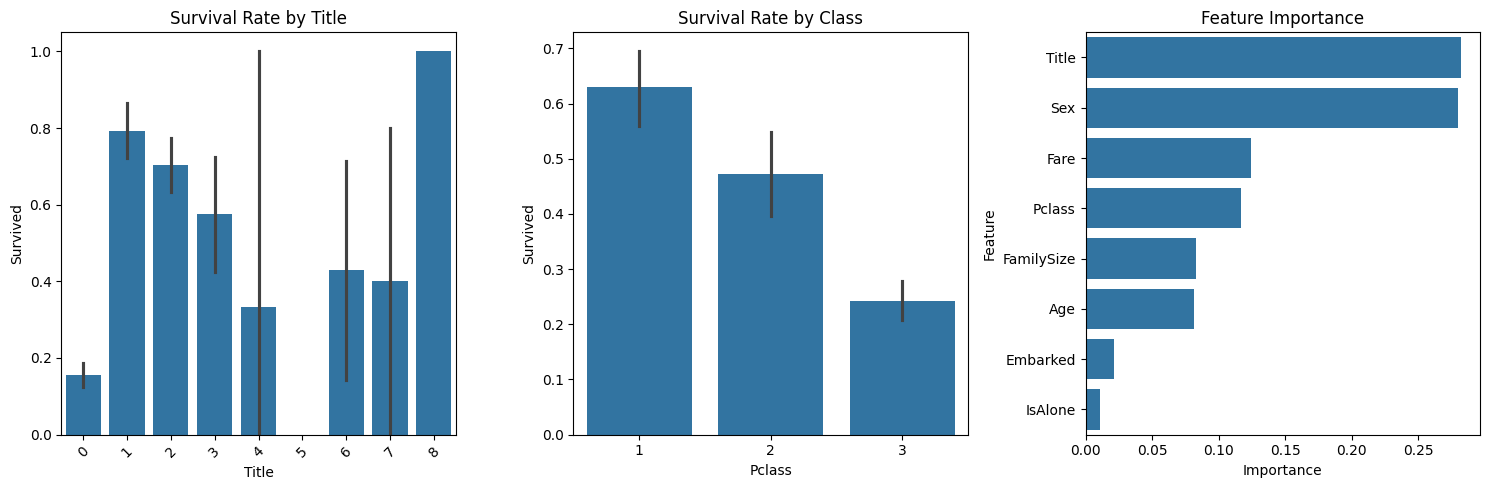

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/Sananda-Dutta/CODSOFT/main/Titanic.csv"
df = pd.read_csv(url)

df.rename(columns={'Enhanced':'Embarked'}, inplace=True)

df = df.assign(
    Age=df['Age'].fillna(df['Age'].median()),
    Embarked=df['Embarked'].fillna(df['Embarked'].mode()[0]),
    Fare=df['Fare'].fillna(df['Fare'].median())
)

df.drop(['Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)

def get_title(name):
    title = name.split(',')[1].split('.')[0].strip()
    return title

df['Title'] = df['Name'].apply(get_title)

title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Lady': 'Royal',
    'Countess': 'Royal',
    'Mme': 'Mrs',
    'Don': 'Royal',
    'Rev': 'Clergy',
    'Dr': 'Dr',
    'Major': 'Military',
    'Col': 'Military',
    'Capt': 'Military',
    'Jonkheer': 'Royal'
}

df['Title'] = df['Title'].map(title_mapping)

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

title_codes = {v:k for k,v in enumerate(df['Title'].unique())}
df['Title'] = df['Title'].map(title_codes)

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2%}")

feature_imp = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n=== Feature Importance ===")
print(feature_imp)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')

plt.subplot(1, 3, 3)
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importance')

plt.tight_layout()
plt.show()